<a href="https://colab.research.google.com/github/meghanasanisetty/VOIS_AICTE_Oct2025_MajorProject_SANISETTY_SRI_MEGHANA/blob/main/Netflix_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Netflix Dataset.csv',low_memory=False, encoding='latin1', on_bad_lines='skip')

In [8]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [ ]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [ ]:
print(df.isnull().sum())


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [ ]:
# Replace null with a placeholder
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Not Specified")
df['Country'] = df['Country'].fillna("Not Specified")
df['Release_Date'] = df['Release_Date'].fillna("Not Specified")
df['Rating'] = df['Rating'].fillna("Not Specified")


In [ ]:
print(df.isnull().sum())


Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64


In [ ]:
print("Before:", df.shape)

Before: (7789, 11)


In [ ]:
df = df.drop_duplicates()
print("After:", df.shape)

After: (7787, 11)


**RATING DISTRIBUTION ACROSS GENRE**

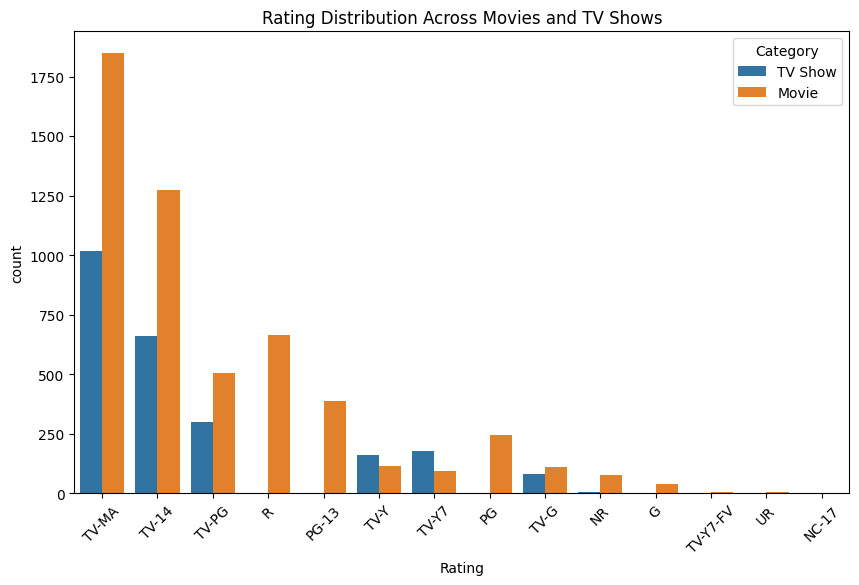

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Rating', hue='Category', order=df['Rating'].value_counts().index)
plt.title('Rating Distribution Across Movies and TV Shows')
plt.xticks(rotation=45)
plt.show()


**AVERAGE DURATION TREND**

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1696442412.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_num'] = df['Duration'].str.extract('(\d+)').astype(float)


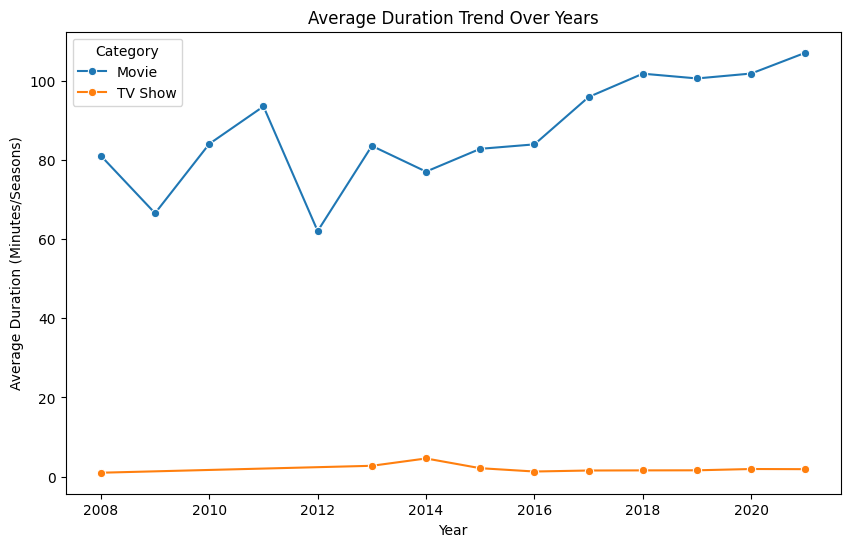

In [14]:
# Extract numeric part from duration
df['Duration_num'] = df['Duration'].str.extract('(\d+)').astype(float)

# Convert 'Release_Date' to datetime objects
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Group by year and category
df['Year'] = df['Release_Date'].dt.year
avg_duration = df.groupby(['Year', 'Category'])['Duration_num'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_duration, x='Year', y='Duration_num', hue='Category', marker='o')
plt.title('Average Duration Trend Over Years')
plt.ylabel('Average Duration (Minutes/Seasons)')
plt.show()

**DIRECTORS AND CAST TRENDS**

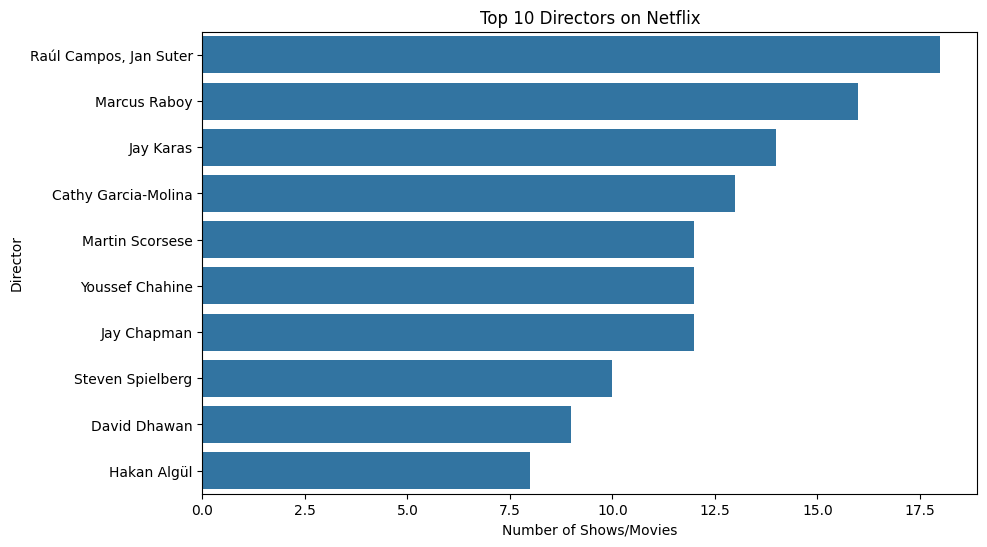

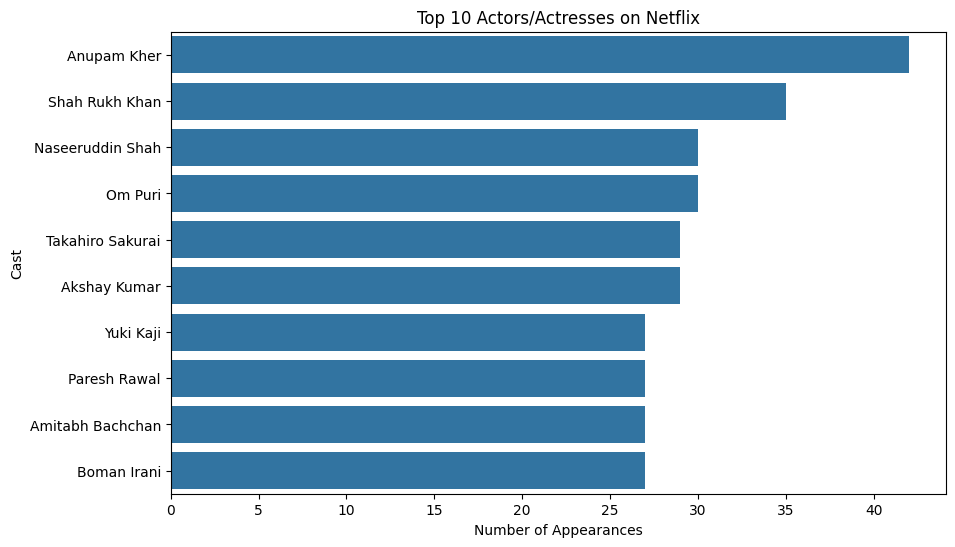

In [15]:
# Top 10 Directors
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Shows/Movies')
plt.show()

# Top 10 Cast Members
cast_counts = df['Cast'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=cast_counts.values, y=cast_counts.index)
plt.title('Top 10 Actors/Actresses on Netflix')
plt.xlabel('Number of Appearances')
plt.show()


**GENRE CORRELATION WITH RATING**

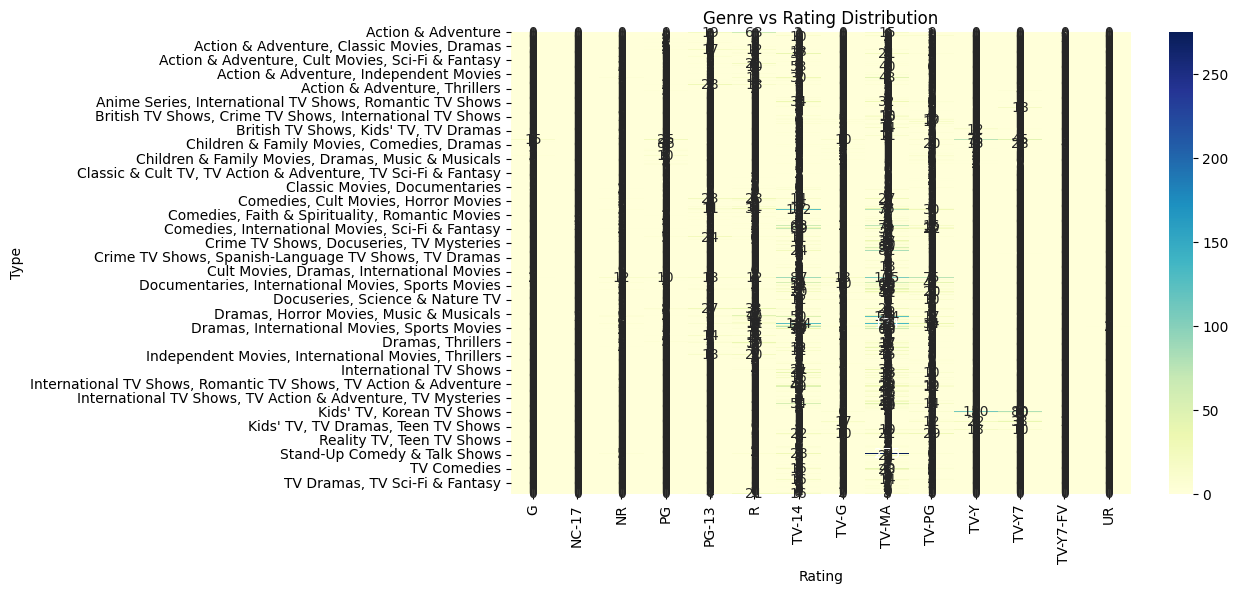

In [16]:
# Clean and analyze ratings by genre/type
genre_rating = df.groupby('Type')['Rating'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(genre_rating, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Genre vs Rating Distribution')
plt.show()


**REGIONAL DOMINANCE IN CONTENT CREATION**

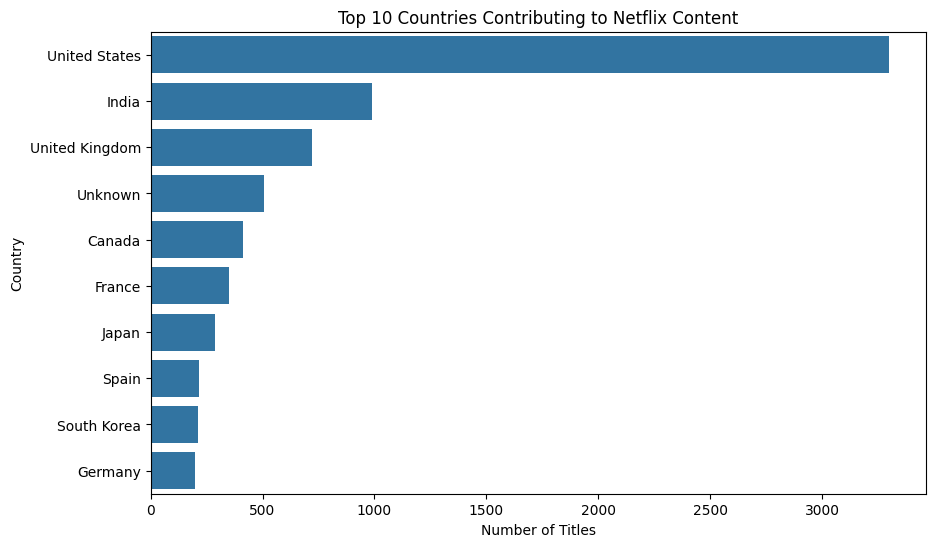

In [17]:
top_countries = df['Country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Contributing to Netflix Content')
plt.xlabel('Number of Titles')
plt.show()


**Movies vs TV Shows Over the Years**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


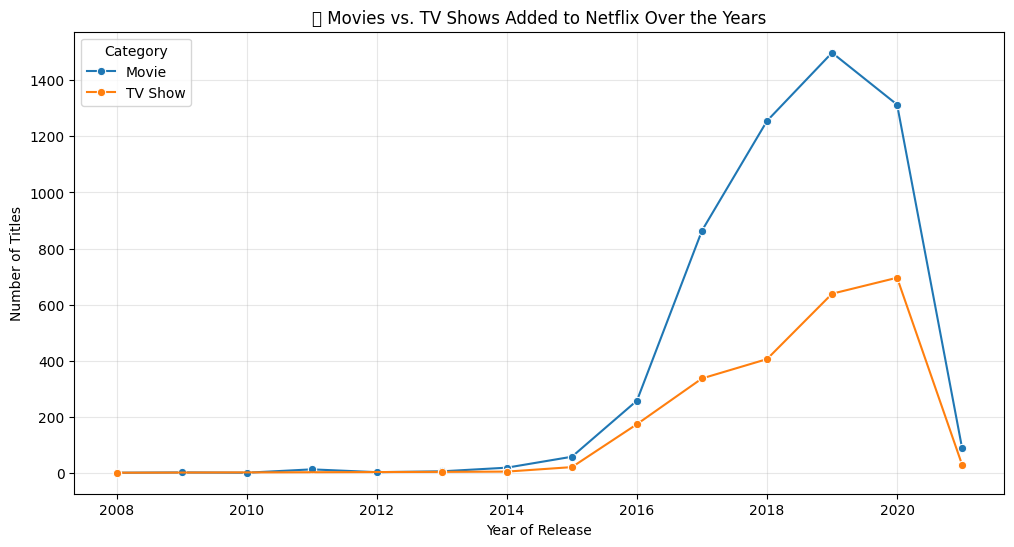

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Netflix Dataset.csv',low_memory=False, encoding='latin1', on_bad_lines='skip')

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

# Drop rows without year
df = df.dropna(subset=['Year'])

# Group by Year and Category
category_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

# Sort by year for a clean timeline
category_trend = category_trend.sort_values(by='Year')

# Plot the trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Count', hue='Category', data=category_trend, marker='o')
plt.title('🎬 Movies vs. TV Shows Added to Netflix Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.grid(True, alpha=0.3)
plt.show()

**Genre Analysis**

🎬 Top 10 Most Common Genres:

Main_Genre
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            197
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


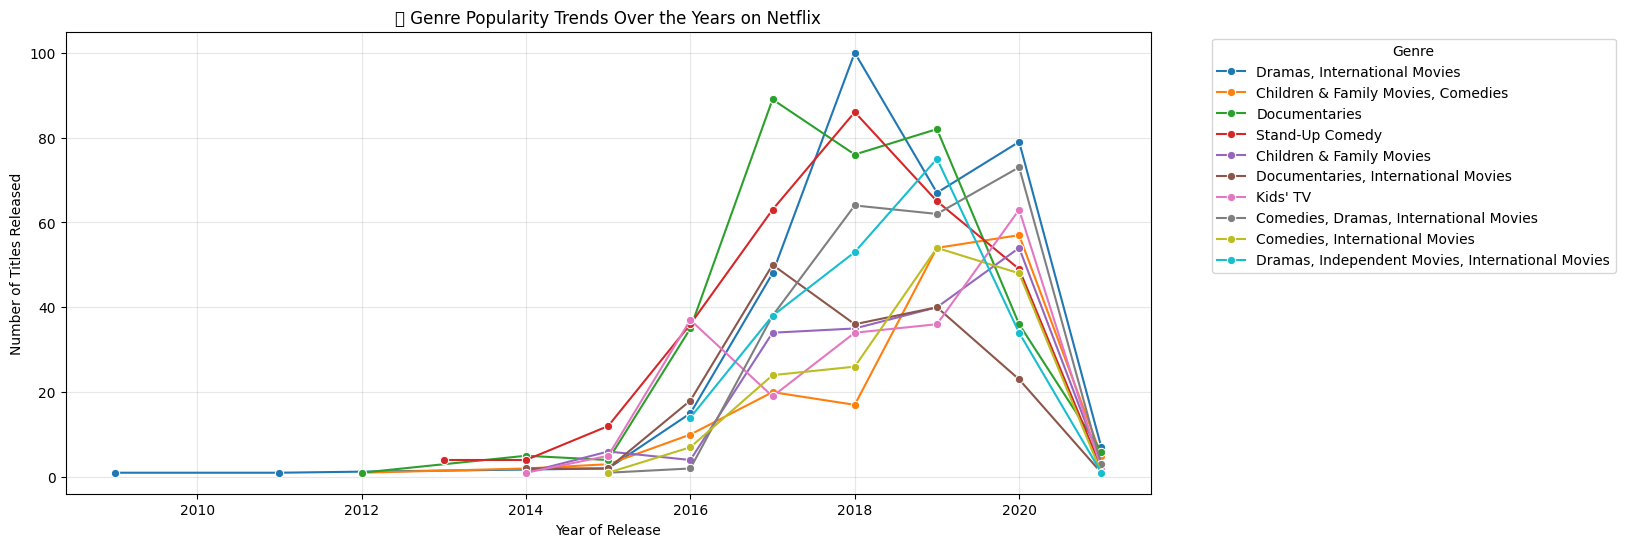

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("/content/Netflix Dataset.csv")

# Convert Release_Date to datetime and extract Year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

# Drop missing year values
df = df.dropna(subset=['Year'])

# Step 1: Extract the first genre from the 'Type' or 'listed_in' column
# (Some rows have multiple genres separated by commas)
df['Main_Genre'] = df['Type'].apply(lambda x: x.strip() if isinstance(x, str) else x)
if 'listed_in' in df.columns:
    df['Main_Genre'] = df['listed_in'].str.split(',').str[0].str.strip()

# Step 2: Find the most common genres
top_genres = df['Main_Genre'].value_counts().head(10)
print("🎬 Top 10 Most Common Genres:\n")
print(top_genres)

# Step 3: Track how their popularity changed over time
top_genre_names = top_genres.index
genre_trend = df[df['Main_Genre'].isin(top_genre_names)] \
                .groupby(['Year', 'Main_Genre']) \
                .size() \
                .reset_index(name='Count')

# Step 4: Plot the trend
plt.figure(figsize=(14,6))
sns.lineplot(x='Year', y='Count', hue='Main_Genre', data=genre_trend, marker="o")
plt.title("🎭 Genre Popularity Trends Over the Years on Netflix")
plt.xlabel("Year of Release")
plt.ylabel("Number of Titles Released")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()
